In [3]:
import numpy as np
import matplotlib.pyplot as plt
import FDMnum as DF

In [ ]:
def masa(x):
    """ Esta función calcula la masa de una barra en un
    punto dado.
    x : punto.
    """
    return -2.5 * (x-6) ** 2 + 100
#    return -2.5 * (x-6) ** 2 + 20 * np.sin(x)

In [ ]:
def densidad(x):
    """ La densidad lineal de la barra.
    Es la derivada de la función de masa.
    """
    return -5 * (x-6)
#    return -5 * (x - 6) + 20 * np.cos(x)

In [ ]:
def recta(x,x0,x1,y0,y1):
    """
    Dados dos puntos en el plano, cálcula la pendiente de
    la recta que pasa por esos puntos y regresa los puntos
    que pasan por esa recta.
    """
    return ((y1-y0)/(x1-x0))*(x-x0) + y0

In [4]:
Lx = 10.0
Nx = 30
x = np.linspace(0,Lx,Nx)
h = Lx / (Nx - 1)

In [ ]:
m = masa(x)
d = densidad(x)

In [ ]:
plt.plot(x,m,'.-',lw=2,label='Masa')
plt.plot(x,d,'.-',lw=2,label='Densidad')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('masa')
plt.legend()
plt.show()

In [ ]:
i = int(Nx / 2)
xi   = x[i]
xip1 = x[i+1]
xim1 = x[i-1]
yi   = masa(xi)
yip1 = masa(xip1)
yim1 = masa(xim1)

In [ ]:
rf = recta(x,xi,xip1,yi,yip1)
rb = recta(x,xi,xim1,yi,yim1)
rc = recta(x,xim1,xip1,yim1,yip1)

In [ ]:
plt.plot(x,m,'.-',lw=4,label='Masa')
plt.plot(xim1,yim1,'s',xi,yi,'o',xip1, yip1,'v')
plt.plot(x,rf,label='Forward')
plt.plot(x,rb,label='Backward')
plt.plot(x,rc,label='Centered')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('masa')
plt.legend()
plt.show()

In [ ]:
df = DF.forwardFD(masa,x,h)
db = DF.backwardFD(masa,x,h)
dc = DF.centeredFD(masa,x,h)
print(len(d),len(df),len(db))

In [ ]:
plt.plot(x,d,'-',lw = 4, label='Densidad')
plt.plot(x,df,'.-',label='Forward')
plt.plot(x,db,'.-',label='Backward')
plt.plot(x,dc,'.-',label='Centered')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('densidad')
plt.legend()
plt.show()

In [ ]:
ef = DF.error(d,df)
eb = DF.error(d,db)
ec = DF.error(d,dc)

In [ ]:
plt.plot(x,ef,label='Forward')
plt.plot(x,eb,label='Backward')
plt.plot(x,ec,label='Centered')
plt.legend()
plt.grid()
plt.show()

## Error cuadrático medio (Root Mean Squared Error)
$\displaystyle RMS = \sqrt{\frac{1}{N} \sum_{i=0}^N (ue_i - un_i)^2}$ 

In [ ]:
def errorRMS(ue, un):
    """ Error cuadrático medio
    ue : valor exacto
    un : valor numérico aprximado
    """
#    return np.linalg.norm(ue-un) / np.sqrt(len(ue))
    return np.sqrt(((ue - un) ** 2).mean())

In [ ]:
rmsf = errorRMS(d,df)
rmsb = errorRMS(d,db)
rmsc = errorRMS(d,dc)

print(rmsf,rmsb,rmsc)

## Uso de la función eval()

In [6]:
funcion = input('Escribe la funcion:')
# ejemplo: 5*np.cos(x)+2*(x-5)**2

Escribe la funcion:5*np.cos(x)+2*(x-5)**2


In [7]:
print(type(funcion), funcion)

<class 'str'> 5*np.cos(x)+2*(x-5)**2


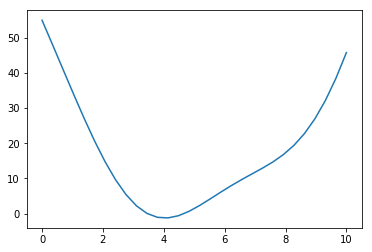

In [9]:
plt.plot(x,eval(funcion))
plt.show()